In [ ]:
#I used this link to make a boiler plate for the spark code, we may not need all of it, but it is a good staritng point

#https://towardsdatascience.com/machine-learning-with-pyspark-and-mllib-solving-a-binary-classification-problem-96396065d2aa

In [1]:
#init spark session
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('ml-blockchain').getOrCreate()


Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/03/28 00:01:21 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/03/28 00:01:22 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [6]:
import sys
!{sys.executable} -m pip install requests
import requests
import hashlib
import json
from binascii import unhexlify, hexlify
import pandas as pd 
import json

data = readBlock("000000000000034a7dedef4a161fa058a2d67a173a90155f3a2fe6fc132e0ebf", False)
data = json.loads(data)

In [8]:
#generally what the data looks like
data

{'ver': 2,
 'prev_block': '00000000000003a20def7a05a77361b9657ff954b2f2080e135ea6f5970da215',
 'mrkl_root': 'a08f8101f50fd9c9b3e5252aff4c1c1bd668f878fffaf3d0dbddeb029c307e88',
 'time': 1348310759,
 'price': 12.24,
 'bits': 436591499,
 'nonce': 4158183488,
 'n_tx': 388,
 'tx': [{'ver': 1,
   'vin_sz': 1,
   'inputs': [{'prev_out': '0000000000000000000000000000000000000000000000000000000000000000',
     'txOutId': 4294967295,
     'scriptLen': 65,
     'script': '03400d0302ef02062f503253482f522cfabe6d6dd90d39663d10f8fd25ec88338295d4c6ce1c90d4aeb368d8bdbadcc1da3b635801000000000000000474073e03',
     'sequence': 4294967295}],
   'vout_sz': 1,
   'outputs': [{'value': 5063517500,
     'scriptLen': 67,
     'pubkey': '4104b0bd634234abbb1ba1e986e884185c61cf43e001f9137f23c2c409273eb16e6537a576782eba668a7ef8bd3b3cfb1edb7117ab65129b8a2e681f3c1e0908ef7bac'}],
   'lock_time': 0},
  {'ver': 1,
   'vin_sz': 1,
   'inputs': [{'prev_out': '6e046b9c7683b5887bbde42ec358542ffe9c250306edb2d0cf386394aa96ee

In [10]:
#what transaction looks like
data['tx'][1]

{'ver': 1,
 'vin_sz': 1,
 'inputs': [{'prev_out': '6e046b9c7683b5887bbde42ec358542ffe9c250306edb2d0cf386394aa96ee10',
   'txOutId': 1,
   'scriptLen': 107,
   'script': '483045022100e5e4749d539a163039769f52e1ebc8e6f62e39387d61e1a305bd722116cded6c022014924b745dd02194fe6b5cb8ac88ee8e9a2aede89e680dcea6169ea696e24d52012102b4b754609b46b5d09644c2161f1767b72b93847ce8154d795f95d31031a08aa2',
   'sequence': 4294967295}],
 'vout_sz': 2,
 'outputs': [{'value': 5586000000,
   'scriptLen': 25,
   'pubkey': '76a914a134408afa258a50ed7a1d9817f26b63cc9002cc88ac'},
  {'value': 4626000000,
   'scriptLen': 25,
   'pubkey': '76a914fec5b1145596b35f59f8be1daf169f375942143388ac'}],
 'lock_time': 0}

In [7]:
#EDA -- Pre-pandas transformation 

#step 1: Understand what transactions mean 

for i in range(data["n_tx"]):
    print((data["tx"][i]["vin_sz"],data["tx"][i]["vout_sz"]))

#key findings: variable length in input and output 


(1, 1)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(2, 2)
(2, 2)
(1, 1)
(4, 2)
(1, 2)
(1, 2)
(1, 2)
(20, 2)
(1, 2)
(1, 2)
(3, 2)
(4, 2)
(1, 2)
(5, 2)
(1, 2)
(2, 2)
(7, 2)
(1, 2)
(1, 2)
(13, 2)
(1, 2)
(1, 2)
(1, 3)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 3)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(10, 2)
(1, 2)
(2, 2)
(1, 2)
(8, 2)
(1, 3)
(1, 2)
(1, 2)
(1, 2)
(2, 2)
(1, 3)
(1, 2)
(1, 3)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(7, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(2, 2)
(1, 2)
(1, 2)
(1, 2)
(4, 2)
(3, 2)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1,

In [34]:
#checking individual transactions
for i in range(data["n_tx"]):
    if data["tx"][i]["vin_sz"] == 2:
        print((data["tx"][i]["vin_sz"],data["tx"][i]["vout_sz"]))
        print(data["tx"][i]["inputs"])
        print("\n")
        print(data["tx"][i]["outputs"])
        break
        
#key findings: 
#this block doesnt give prev_out's values, it only gives the hash, need addition script to get that if needed
#output offers the value and the ratio, could be used for prediction 
#output has the same scriptLen and public key
#the value is in satoshi (how much bitcoin i.e.)

(2, 2)
[{'prev_out': 'f8c693771b2992a11b53c045369ab31a920de1d921ff3c148a9d0487c8f90baf', 'txOutId': 16, 'scriptLen': 139, 'script': '483045022100904a2e0e8f597fc1cc271b6294b097a6edc952e30c453e3530f92492749769a8022018464c225b03c28791af06bc7fed129dcaaeff9ec8135ada1fb11762ce081ea9014104da289192b0845d5b89ce82665d88ac89d757cfc5fd997b1de8ae47f7780ce6a32207583b7458d1d2f3fd6b3a3b842aea9eb789e2bea57b03d40e684d8e1e0569', 'sequence': 4294967295}, {'prev_out': 'e51d2177332baff9cfbbc08427cf0d85d28afdc81411cdbb84f40c95858b080d', 'txOutId': 1, 'scriptLen': 139, 'script': '4830450220369df7d42795239eabf9d41aee75e3ff20521754522bd067890f8eedf6044c6d0221009acfbd88d51d842db87ab990a48bed12b1f816e95502d0198ed080de456a988d014104e0ec988a679936cea80a88e6063d62dc85182e548a535faecd6e569fb565633de5b4e83d5a11fbad8b01908ce71e0374b006d84694b06f10bdc153ca58a53f87', 'sequence': 4294967295}]


[{'value': 6192597494, 'scriptLen': 25, 'pubkey': '76a914764b8c407b9b05cf35e9346f70985945507fa83a88ac'}, {'value': 127000000, 'sc

In [53]:
#helper for finding actualy bitcoin price in dollars

df = pd.read_csv('Data/bitcoin_hist_price.csv')
price_data = df.to_numpy()
n = price_data.shape[0]


# takes a timestamp which represents unit timestamp and outputs the bitcoin price
# based on historical data
def find_price(timestamp, data):
  # use binary search. Take at most 23 to find the answer
  left = 0
  right = n - 1

  timestamp = int(timestamp)

  while left <= right:
    mid = (left + right) // 2
    mid_timestamp = int(data[mid][0])

    if abs(timestamp - mid_timestamp) <= 60:
      # within plus/minus one minute of mid_timestamp
      return int(data[mid][4])
    elif timestamp > mid_timestamp:
      left = mid + 1
    else:
      right = mid - 1
  
  return 0 # used data after 2021-03-31 which this method will fail to predict



In [64]:
import sys
!{sys.executable} -m pip install requests
import requests
import hashlib
import json
from binascii import unhexlify, hexlify

In [13]:
#script to transform the json file into pandas, while getting rid of some metadata to make it cleaner

#all the columns in the dataframe

#df = pd.DataFrame(columns=["prev_block", "time", "price", "bits", "nonce", "n_tx", "vin_sz", "vout_sz","in_out_rat", 
                        #"transaction_value", "transaction_array"]
                         # )

#df.to_csv('Data/bitcoin_data.csv', index=False, header=True)
##new columns: 1.in_out_rat: ratio of input vector and output vector per transaction
##             2.transcation_value: the total number of satoshi that went in this transaction 
##             3.transaction_array: the value per output in the array 
## 4. in_prev_out: the hash out the input in case we need it later we will add it in, 

prev_block = "0000000000000139248d8c6ec16be337f3b985606c132375c0a55c5950683006"

#heuristically just gonna use 10000 blocks 
for i in range(10000):
    df = pd.DataFrame(columns=["prev_block", "time", "price", "bits", "nonce", "n_tx", "vin_sz", "vout_sz","in_out_rat", 
                        "transaction_value", "transaction_array"]
    )

    
    data = readBlock(prev_block, False)
    data = json.loads(data)
    
    #print(i)
    #print(data["prev_block"])
    
    prev_block = data["prev_block"]
    time = data["time"]
    price = data["price"]
    bits = data["bits"]
    nonce = data["nonce"]
    n_tx = data["n_tx"]

    for i in range(n_tx):
        vin_sz = data["tx"][i]["vin_sz"]
        vout_sz = data["tx"][i]["vout_sz"]
        in_out_rat =  vin_sz/vout_sz
        transaction_value = 0
        transaction_array = []
        for out in data["tx"][i]["outputs"]:
            transaction_value = transaction_value + out["value"]
            transaction_array.append(out["value"])          
        #json = 
        df = df.append({"prev_block" : prev_block, 
                "time" : time, 
                "price" : price,
                "bits" : bits, 
                "nonce" : nonce,
                "n_tx" : n_tx,
                "vin_sz" : vin_sz,
                "vout_sz" : vout_sz,
                "in_out_rat" :  in_out_rat, 
                "transaction_value" : transaction_value,
                "transaction_array" : transaction_array
               }, ignore_index = True)
    df.to_csv('Data/bitcoin_data.csv', mode='a', index=False, header=False)



In [15]:
#need seperate script 
#we will use prev_block hash as an id as it is distinct by definition
df = spark.read.csv("Data/bitcoin_data.csv", header = True, inferSchema = True)
df.printSchema()

root
 |-- prev_block: string (nullable = true)
 |-- time: integer (nullable = true)
 |-- price: double (nullable = true)
 |-- bits: integer (nullable = true)
 |-- nonce: long (nullable = true)
 |-- n_tx: integer (nullable = true)
 |-- vin_sz: integer (nullable = true)
 |-- vout_sz: integer (nullable = true)
 |-- in_out_rat: double (nullable = true)
 |-- transaction_value: long (nullable = true)
 |-- transaction_array: string (nullable = true)



<AxesSubplot:>

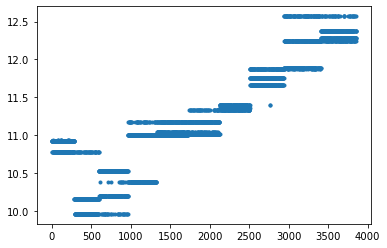

In [39]:
prices = df.groupBy("prev_block").mean("price")
prices = prices.toPandas()
prices = prices['avg(price)']

prices = prices.loc[::-1].reset_index(drop=True)

prices.plot(style='.')

In [40]:
#number of transactions 
df.count()
#size of data is 122.7 MB

826362

In [61]:
df.select("transaction_value").summary().toPandas().transpose()

0                      1                     2    3  \
summary             count                   mean                stddev  min   
transaction_value  826362  4.0970870619915375E10  3.489889922455106E11    1   

                          4          5           6               7  
summary                 25%        50%         75%             max  
transaction_value  16349988  129000018  1345950000  15833630131091

In [77]:
#data transformation, sum at a price level
df.createOrReplaceTempView("transaction")


grouped_df = spark.sql("SELECT prev_block, avg(time) as time, avg(price) as price,\
                       avg(bits) as bits, avg(nonce) as nonce, avg(n_tx) as n_tx, Sum(transaction_value) as total_transaction_value \
                        FROM transaction \
                       group by prev_block")

grouped_df.take(5)

grouped_pd = grouped_df.toPandas()

grouped_pd

prev_block          time  price  \
0     0000000000000542ce4b138273270d16ca8a6dd417b4f6...  1.348238e+09  12.37   
1     0000000000000459d9c7b3d57e8d26c42ea5cdba9b6193...  1.348204e+09  12.37   
2     00000000000004ece1ff977cf7b01719d2ce7d6d62e311...  1.348079e+09  12.57   
3     000000000000020f0588bef4356a41006005dcb4687d9d...  1.348303e+09  12.24   
4     0000000000000351a73dd3a03b3f8962fe1b207bfcb1a3...  1.348246e+09  12.37   
...                                                 ...           ...    ...   
3851  000000000000046152094f66cbccfd6af31d662fcf4cc3...  1.346256e+09  10.92   
3852  00000000000005f450da3861e48854f25e19b0593cb736...  1.346254e+09  10.92   
3853  00000000000003109528bbfbf635404925f23bdd270caa...  1.346207e+09  10.92   
3854  00000000000003e7959013acfb1923cdcedadef7b86f88...  1.346324e+09  10.78   
3855  00000000000004d5e3d1cfc5294c860d9fec7b0014a935...  1.346284e+09  10.92   

             bits         nonce   n_tx  total_transaction_value  
0     436591499.0  3.926059e+09   87.0             183990664165  
1     436591499.0  1.588595e+09   57.0             413748063070  
2     436615736.0  2.411628e+08   92.0           12613332734909  
3     436591499.0  2.914658e+09  102.0            4251723781714  
4     436591499.0  2.534136e+09  233.0             716570666623  
...           ...           ...    ...                      ...  
3851  436658110.0  3.829149e+09  512.0           20390228922566  
3852  436658110.0  3.864687e+09  143.0           13308717838284  
3853  436658110.0  3.506792e+09    1.0               5000000000  
3854  436658110.0  3.744247e+09   13.0              26497731544  
3855  436658110.0  3.986711e+09  129.0            1975695539278  

[3856 rows x 7 columns]

In [84]:
#created column for price going up or down
grouped_pd = grouped_pd.sort_values(by=['time']).reset_index(drop=True)
grouped_pd['price_label'] = 1

counter = 0
prev = 0
for index, row in grouped_pd.iterrows():
    price = row['price']
    if price > prev:
        grouped_pd.at[index, 'price_label'] = 1
    elif price < prev:
        grouped_pd.at[index, 'price_label'] = -1
    else:
        grouped_pd.at[index, 'price_label'] = 0
    prev = row['price']


In [85]:
#drop the ones that are remaining the same
grouped_pd = grouped_pd[grouped_pd['price_label'] != 0]

#we dont really need the hash code for prev_block anymore, so we can drop it
grouped_pd = grouped_pd.drop(['prev_block'], axis=1)
grouped_pd

time  price         bits         nonce   n_tx  \
0     1.346194e+09  10.94  436658110.0  3.460340e+09   56.0   
1     1.346195e+09  10.94  436658110.0  2.260047e+09  670.0   
2     1.346195e+09  10.94  436658110.0  2.439635e+09  378.0   
3     1.346195e+09  10.94  436658110.0  1.227703e+09  151.0   
4     1.346196e+09  10.94  436658110.0  1.802557e+09   79.0   
...            ...    ...          ...           ...    ...   
3851  1.348308e+09  12.24  436591499.0  4.270599e+09   20.0   
3852  1.348309e+09  12.24  436591499.0  1.829952e+09  169.0   
3853  1.348310e+09  12.24  436591499.0  2.542929e+09  124.0   
3854  1.348310e+09  12.24  436591499.0  8.876846e+08  239.0   
3855  1.348311e+09  12.24  436591499.0  4.158183e+09  388.0   

      total_transaction_value  price_label  
0               3547400928930            1  
1               1798637477929           -1  
2                198959823939            1  
3                131546447487           -1  
4                923417417737           -1  
...                       ...          ...  
3851              48180012121            1  
3852            9109734613170            1  
3853            2968393011619            1  
3854            8548577805286           -1  
3855           21173167936751           -1  

[3010 rows x 7 columns]

In [129]:
#data transformation #1, regularize time 
min_time = grouped_pd['time'].min()

for index, row in grouped_pd.iterrows():
    grouped_pd.at[index, 'time'] = grouped_pd.at[index, 'time'] - min_time

grouped_pd['bits'] = grouped_pd['bits'].astype(int)
grouped_pd['nonce'] = grouped_pd['nonce'].astype(int)
grouped_pd['n_tx'] = grouped_pd['n_tx'].astype(int)
grouped_pd['price_label'] = grouped_pd['price_label'].replace(-1, 0)
grouped_pd



time       bits       nonce  n_tx  total_transaction_value  \
0           0.0  436658110  3460340367    56            3547400928930   
1         996.0  436658110  2260047143   670            1798637477929   
2        1092.0  436658110  2439634688   378             198959823939   
3        1324.0  436658110  1227703378   151             131546447487   
4        2157.0  436658110  1802556873    79             923417417737   
...         ...        ...         ...   ...                      ...   
3851  2113969.0  436591499  4270598626    20              48180012121   
3852  2115193.0  436591499  1829951554   169            9109734613170   
3853  2115465.0  436591499  2542928768   124            2968393011619   
3854  2115554.0  436591499   887684620   239            8548577805286   
3855  2116709.0  436591499  4158183488   388           21173167936751   

      price_label  
0               1  
1               0  
2               1  
3               0  
4               0  
...           ...  
3851            1  
3852            1  
3853            1  
3854            0  
3855            0  

[3010 rows x 6 columns]

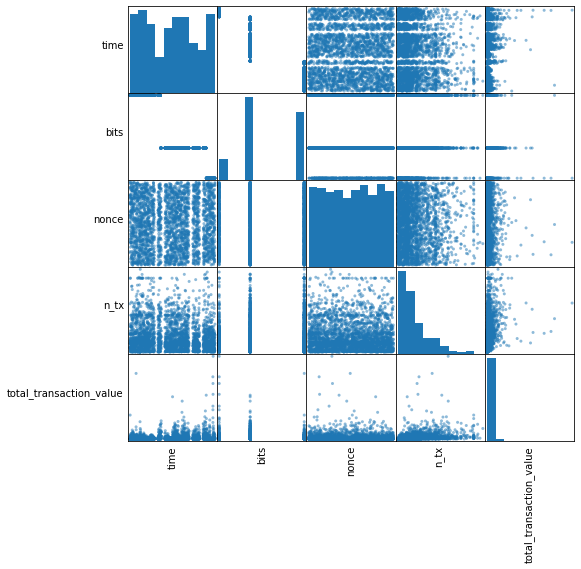

In [130]:
from pandas.plotting import scatter_matrix
#correlation
numeric_data = grouped_pd[['time', 'bits', 'nonce', 'n_tx', 'total_transaction_value']]
axs = scatter_matrix(numeric_data, figsize=(8, 8));
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

    
#remove variables mannually if the variables are strongly correlated, there aren't any

In [132]:
#remove prices, cuz that's cheating
grouped_pd = grouped_pd.drop(['price'], axis=1)
grouped_pd

time       bits       nonce  n_tx  total_transaction_value  \
0           0.0  436658110  3460340367    56            3547400928930   
1         996.0  436658110  2260047143   670            1798637477929   
2        1092.0  436658110  2439634688   378             198959823939   
3        1324.0  436658110  1227703378   151             131546447487   
4        2157.0  436658110  1802556873    79             923417417737   
...         ...        ...         ...   ...                      ...   
3851  2113969.0  436591499  4270598626    20              48180012121   
3852  2115193.0  436591499  1829951554   169            9109734613170   
3853  2115465.0  436591499  2542928768   124            2968393011619   
3854  2115554.0  436591499   887684620   239            8548577805286   
3855  2116709.0  436591499  4158183488   388           21173167936751   

      price_label  
0               1  
1               0  
2               1  
3               0  
4               0  
...           ...  
3851            1  
3852            1  
3853            1  
3854            0  
3855            0  

[3010 rows x 6 columns]

In [133]:
#preparing the data for LogisticRegression
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import  VectorAssembler
df = spark.createDataFrame(grouped_pd)
stages = []
numericCols = ['time', 'bits', 'nonce', 'n_tx', 'total_transaction_value']
assemblerInputs = numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [134]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['price_label', 'features'] + numericCols
df = df.select(selectedCols)
df.printSchema()

root
 |-- price_label: long (nullable = true)
 |-- features: vector (nullable = true)
 |-- time: double (nullable = true)
 |-- bits: long (nullable = true)
 |-- nonce: long (nullable = true)
 |-- n_tx: long (nullable = true)
 |-- total_transaction_value: long (nullable = true)



In [135]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

0  \
price_label                                                              1   
features                 [0.0, 436658110.0, 3460340367.0, 56.0, 3547400...   
time                                                                   0.0   
bits                                                             436658110   
nonce                                                           3460340367   
n_tx                                                                    56   
total_transaction_value                                      3547400928930   

                                                                         1  \
price_label                                                              0   
features                 [996.0, 436658110.0, 2260047143.0, 670.0, 1798...   
time                                                                 996.0   
bits                                                             436658110   
nonce                                                           2260047143   
n_tx                                                                   670   
total_transaction_value                                      1798637477929   

                                                                         2  \
price_label                                                              1   
features                 [1092.0, 436658110.0, 2439634688.0, 378.0, 198...   
time                                                                1092.0   
bits                                                             436658110   
nonce                                                           2439634688   
n_tx                                                                   378   
total_transaction_value                                       198959823939   

                                                                         3  \
price_label                                                              0   
features                 [1324.0, 436658110.0, 1227703378.0, 151.0, 131...   
time                                                                1324.0   
bits                                                             436658110   
nonce                                                           1227703378   
n_tx                                                                   151   
total_transaction_value                                       131546447487   

                                                                         4  
price_label                                                              0  
features                 [2157.0, 436658110.0, 1802556873.0, 79.0, 9234...  
time                                                                2157.0  
bits                                                             436658110  
nonce                                                           1802556873  
n_tx                                                                    79  
total_transaction_value                                       923417417737

In [136]:
#train test split
train, test = df.randomSplit([0.7, 0.3], seed = 451)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 2069
Test Dataset Count: 941


In [137]:
#logistic regression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'price_label', maxIter=10)
lrModel = lr.fit(train)

22/03/28 02:18:52 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
22/03/28 02:18:52 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


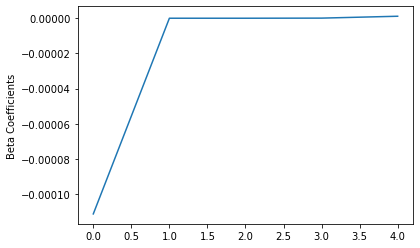

In [138]:
# showing results 
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

/Users/simonzhang/opt/anaconda3/lib/python3.9/site-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


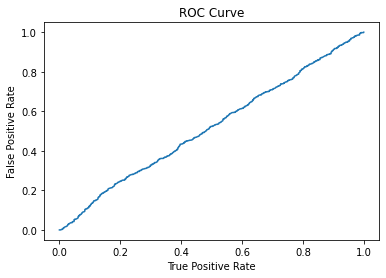

Training set areaUnderROC: 0.5189775878911732


In [139]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

/Users/simonzhang/opt/anaconda3/lib/python3.9/site-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


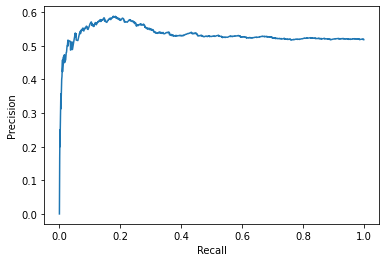

In [140]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [161]:
predictions = lrModel.transform(test)
predictions = predictions.select('price_label','rawPrediction', 'prediction', 'probability')

predictions = predictions.withColumnRenamed("price_label","label")
#predictions.select('n_tx', 'total_transaction_value','price_label', 'rawPrediction', 'prediction', 'probability').show(10)

In [162]:
#make prediction
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.506229262162431


In [163]:
def readBlock(hash, printouts=False):
    # api-endpoint
    # URL = "https://blockchain.info/rawblock/000000000019d6689c085ae165831e934ff763ae46a2a6c172b3f1b60a8ce26f?format=hex"
    # URL = "https://blockchain.info/rawblock/00000000000000001e8d6829a8a21adc5d38d0a473b144b6765798e61f98bd1d?format=hex"
    URL = "https://blockchain.info/rawblock/" + hash + "?format=hex"

    # sending get request and saving the response as response object
    r = requests.get(url = URL) #, params = PARAMS)
    
    # print(r.content)
    if printouts: print('text: ' + r.text)
    if printouts: print('encoding: ' + r.encoding)
    # print('type: ' + type(r.text))

    blockHex = r.text
    # head = r.text[:size2]
    global curr
    curr = 0

    def read(size):
        global curr
        prev = curr
        curr += size * 2
    #     if size == 1:
    #         print("prev: ", prev)
    #         print("curr: ", curr)
    #         print("head sect: ", blockHex[prev:curr])
        return blockHex[prev:curr]

    def readInt(size=4):
        tempArr = bytearray(bytes.fromhex(read(size)))
    #     if size == 1:
    #         print("tempArr: ", tempArr)
        return int.from_bytes(tempArr, "little")

    def readHash(size=32):
        tempArr = bytearray(bytes.fromhex(read(32)))
        tempArr.reverse()
        return tempArr

    def readVarInt():
        size = readInt(1)
    #     print("readvarint size: ", size)
        if size < 253:
            return size
        elif size == 253:
            return readInt(2)
        elif size == 254:
            return readInt(4)
        elif size == 255:
            return readInt(8)
        return -1

    def readTxInput():
        tx_input = {}
        tx_input["prev_out"] = readHash().hex()
        tx_input["txOutId"] = readInt(4)
        tx_input["scriptLen"] = readVarInt()
        tx_input["script"] = read(tx_input["scriptLen"])
        tx_input["sequence"] = readInt(4)
        return tx_input

    def readTxInputs(vin_sz):
        outputs = []
        for i in range(0, vin_sz):
            outputs.append(readTxInput())
        return outputs
        
    def readTxOutput():
        tx_output = {}
        tx_output["value"] = readInt(8)
        tx_output["scriptLen"] = readVarInt()
        tx_output["pubkey"] = read(tx_output["scriptLen"])
        return tx_output
        
    def readTxOutputs(vout_sz):
        outputs = []
        for i in range(0, vout_sz):
            outputs.append(readTxOutput())
        return outputs
        
    def readTx(n_tx):
        outputs = []
        for i in range(0, n_tx):
            tx = {}
            tx["ver"] = readInt()
            tx["vin_sz"] = readVarInt()
            tx["inputs"] = readTxInputs(tx["vin_sz"])
            tx["vout_sz"] = readVarInt()
            tx["outputs"] = readTxOutputs(tx["vout_sz"])
            tx["lock_time"] = readInt()
            outputs.append(tx)
        return outputs

    returnObj = {}

    if printouts: print("===HEADER===")

    returnObj["ver"] = readInt()
    if printouts: print("ver: ", returnObj["ver"])

    returnObj["prev_block"] = readHash().hex()
    if printouts: print("prev_block: ", returnObj["prev_block"])

    returnObj["mrkl_root"] = readHash().hex()
    if printouts: print("mrkl_root: ", returnObj["mrkl_root"])

    returnObj["time"] = readInt()
    if printouts: print("time: ", returnObj["time"])
    
    URL2 = "https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=1&aggregate=1&toTs=" + str(returnObj["time"])
    r2 = requests.get(url=URL2).json()
    #print("r2: ", r2)
    returnObj["price"] = r2["Data"]["Data"][-1]["close"]
#     returnObj["price"] = json.loads(r2).get("close")

    returnObj["bits"] = readInt()
    if printouts: print("bits: ", returnObj["bits"])

    returnObj["nonce"] = readInt()
    if printouts: print("nonce: ", returnObj["nonce"])

    if printouts: print("===TRANSACTIONS===")

    returnObj["n_tx"] = readVarInt()
    if printouts: print("n_tx: ", returnObj["n_tx"])

    returnObj["tx"] = readTx(returnObj["n_tx"])
    if printouts: print("tx: ", returnObj["tx"])
        
    returnObjJson = json.dumps(returnObj)
    if printouts: print(json.dumps(returnObj, indent=2, sort_keys=False))

    return returnObjJson